In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv('data.csv')

In [89]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Data Preparation

In [90]:
def cleanColNames(df: pd.DataFrame) -> pd.DataFrame:
  df.columns = df.columns.str.lower().str.replace(' ', '_')
  return df

In [91]:
def standardizeTextData(df: pd.DataFrame) -> pd.DataFrame:
  string_columns = list(df.dtypes[df.dtypes == 'object'].index)

  for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
  
  return df

In [92]:
df = cleanColNames(df)
df = standardizeTextData(df)

In [93]:
df.year = df.year.astype(str)
df.number_of_doors = df.number_of_doors.astype(str)

In [94]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory Data Analysis

In [95]:
df.describe()

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity,msrp
count,11845.00000,11884.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,249.38607,5.628829,26.637485,19.733255,1554.911197,4.059474e+04
std,109.19187,1.780559,8.863001,8.987798,1441.855347,6.010910e+04
min,55.00000,0.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,170.00000,4.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,227.00000,6.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,300.00000,6.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,1001.00000,16.000000,354.000000,137.000000,5657.000000,2.065902e+06


[Text(0.5, 1.0, 'Distribution of Car Prices')]

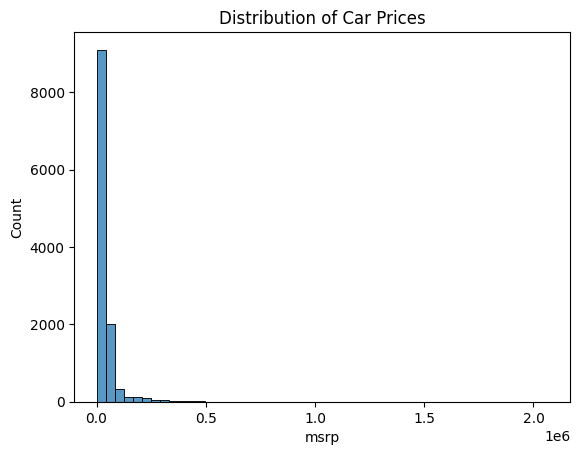

In [96]:
sns.histplot(df.msrp, bins=50).set(title='Distribution of Car Prices')

[Text(0.5, 1.0, 'Distribution of Car Prices')]

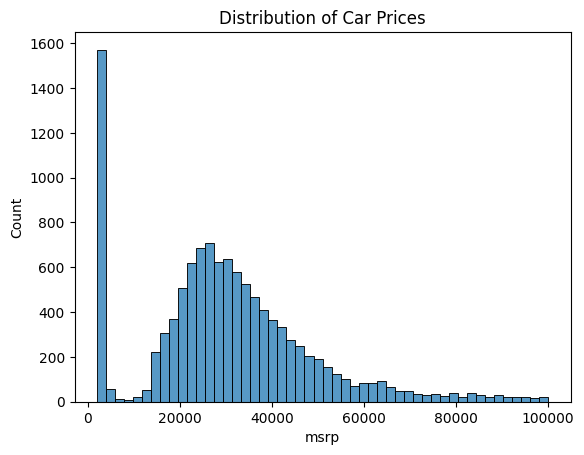

In [97]:
sns.histplot(df[df.msrp < 100000].msrp, bins=50).set(title='Distribution of Car Prices')

## Model Input Preparation

In [98]:
def splitDataset(df: pd.DataFrame, cv_ratio, test_ratio) -> pd.DataFrame:
  n = df.shape[0]

  n_val = int(cv_ratio * n)
  n_test = int(test_ratio * n)
  n_train = n - (n_val + n_test)

  idx = list(df.index)

  np.random.seed(123)
  np.random.shuffle(idx)

  df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
  df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
  df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

  return df_train, df_val, df_test

In [99]:
def logTransform(df: pd.DataFrame) -> pd.DataFrame:
  price_logs = np.log1p(df.msrp)
  df['msrp_log'] = price_logs

  df.drop('msrp', axis=1, inplace=True)

  return df

In [100]:
df_train, df_val, df_test = splitDataset(df, .2, .2)
df_train = logTransform(df_train)
df_val = logTransform(df_val)
df_test = logTransform(df_test)

In [101]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,msrp_log
0,plymouth,colt,1994,regular_unleaded,113.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,30,23,535,2000,7.601402
1,rolls-royce,phantom_coupe,2014,premium_unleaded_(required),453.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,performance",large,coupe,19,11,86,433550,12.979765
2,toyota,tacoma,2017,regular_unleaded,278.0,6.0,automatic,four_wheel_drive,4.0,NaN,compact,crew_cab_pickup,23,18,2031,35315,10.472091
3,honda,pilot,2016,regular_unleaded,280.0,6.0,automatic,front_wheel_drive,4.0,crossover,midsize,4dr_suv,27,19,2202,30145,10.313808
4,infiniti,q50,2016,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,29,19,190,39900,10.594157
